# Read a geotiff image

This short notebook shows how to read and represent [GeoTIFF](http://trac.osgeo.org/geotiff/) images.<br>
The first file used in this exampe comes from NASA [EODIS WorldView](https://earthdata.nasa.gov/labs/worldview/) and corresponds to the area of Cadiz on January 18, 2016. The selected resolution is 1 km, in order to keep a small file, but you can try with another region and resolution.

In [26]:
imagefile = "../data/nasa-worldview-2016-01-18.tiff"

## Modules

The Geospatial Data Abstraction Library ([GDAL](https://pypi.python.org/pypi/GDAL/)) allows the manipulation of manipulating geospatial raster data.

In [27]:
from osgeo import gdal
import matplotlib.pyplot as plt
%matplotlib inline

## Read geotiff image

In [28]:
gtif = gdal.Open(imagefile)
gtif.GetProjectionRef()

'GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AUTHORITY["EPSG","4326"]]'

The plot axis limits are set to the proper map coordinates.

In [29]:
arr = gtif.ReadAsArray()
trans = gtif.GetGeoTransform()
extent = (trans[0], trans[0] + gtif.RasterXSize*trans[1],
          trans[3] + gtif.RasterYSize*trans[5], trans[3])

## Make the plot

We use the function [imshow](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.imshow) and specity the extent we just computed.

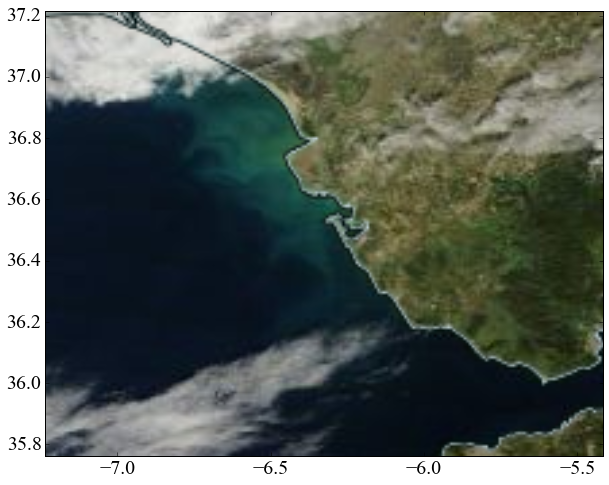

In [30]:
plt.figure(figsize=(10, 10))
plt.imshow(arr[:3,:,:].transpose((1, 2, 0)), extent=extent)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()